In [1]:
import pandas as pd
import numpy as np
from joblib import load

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from random import randint, shuffle

In [2]:
import seaborn as sns

In [3]:
from sklearn.metrics import confusion_matrix, recall_score, f1_score, precision_score, accuracy_score

In [4]:
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
def get_metrics(y_true, y_pred):
    cm_val = confusion_matrix(y_true=y_true,y_pred=y_pred)
    precision_val = precision_score(y_true=y_true,y_pred=y_pred)
    recall_val = recall_score(y_true=y_true,y_pred=y_pred)
    f1_val = f1_score(y_true=y_true,y_pred=y_pred)
    accuracy_val = accuracy_score(y_true=y_true,y_pred=y_pred)

    return [cm_val, precision_val, recall_val, f1_val, accuracy_val]

In [6]:
random_seed_list = [randint(1,10000) for i in range(1000)]
random_seed_list = list(set(random_seed_list))

In [7]:
len(random_seed_list)

955

In [8]:
shuffle(random_seed_list)
random_seed_list = random_seed_list[:100]

In [9]:
df_data = pd.read_csv("../../process_dataset/examples_1009/data_for_training.csv")
df_data

,age,bp_systolic,bp_diastolic,bp_pam,bp_pp,weight kg,height cm,our_imc,sex_1,sex_2,response
0,75.0,108,70,82.666667,38,70.0,160,27.3437,1,0,0
1,66.0,122,72,88.666667,50,52.0,149,23.4224,1,0,0
2,77.0,126,72,90.000000,54,85.0,160,33.2031,1,0,0
3,73.0,130,80,96.666667,50,69.0,151,30.2618,1,0,0
4,65.0,129,73,91.666667,56,58.0,149,26.1249,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
524,78.0,105,56,72.333333,49,82.2,155,34.2144,0,1,1
525,67.0,134,87,102.666667,47,68.1,154,28.7148,0,1,1
526,77.0,141,80,100.333333,61,67.1,152,29.0426,0,1,1
527,61.0,106,58,74.000000,48,58.4,162,22.2527,0,1,1


In [10]:
response = df_data["response"].values
data_values = df_data.drop(columns=["response"]).values

In [11]:
matrix_data_val = []
matrix_data_test = []

for random_seed in random_seed_list:
    X_train, X_test, y_train, y_test = train_test_split(data_values, response, test_size=0.2, random_state=random_seed)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=random_seed)

    scaler_instance = RobustScaler()
    scaler_instance.fit(X_train)

    X_train_s = scaler_instance.transform(X_train)
    X_val_s = scaler_instance.transform(X_val)
    X_test_s = scaler_instance.transform(X_test)

    ridge_classifier = RidgeClassifier()
    ridge_classifier.fit(X=X_train_s, y=y_train)

    predictions_val = ridge_classifier.predict(X_val_s)
    predictions_test = ridge_classifier.predict(X_test_s)
    
    metrics_val = get_metrics(y_val, predictions_val)
    metrics_test = get_metrics(y_test, predictions_test)

    matrix_data_val.append(metrics_val)

    matrix_data_test.append(metrics_test)

df_exploring_ridge_val = pd.DataFrame(data=matrix_data_val, 
                                  columns=['cm_val', 'precision_val', 'recall_val', 'f1_val', 'accuracy_val'])

df_exploring_ridge_val['stage'] = "Validacion"

df_exploring_ridge_test = pd.DataFrame(data=matrix_data_test, 
                                  columns=['cm_val', 'precision_val', 'recall_val', 'f1_val', 'accuracy_val'])

df_exploring_ridge_test['stage'] = "Testeo"

<Axes: xlabel='precision_val'>

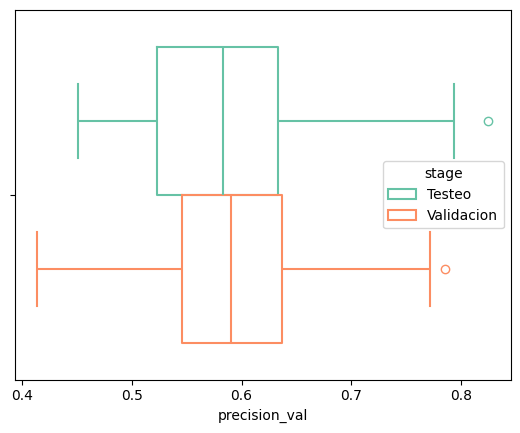

In [12]:
df_concat = pd.concat([df_exploring_ridge_test, df_exploring_ridge_val], axis=0)
sns.boxplot(data=df_concat, x='precision_val', hue="stage", fill=False, palette="Set2")

In [13]:
matrix_data_val = []
matrix_data_test = []

for random_seed in random_seed_list:
    X_train, X_test, y_train, y_test = train_test_split(data_values, response, test_size=0.2, random_state=random_seed)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=random_seed)

    scaler_instance = RobustScaler()
    scaler_instance.fit(X_train)

    X_train_s = scaler_instance.transform(X_train)
    X_val_s = scaler_instance.transform(X_val)
    X_test_s = scaler_instance.transform(X_test)

    rf_classifier = RandomForestClassifier()
    rf_classifier.fit(X=X_train_s, y=y_train)

    predictions_val = rf_classifier.predict(X_val_s)
    predictions_test = rf_classifier.predict(X_test_s)
    
    metrics_val = get_metrics(y_val, predictions_val)
    metrics_test = get_metrics(y_test, predictions_test)

    matrix_data_val.append(metrics_val)

    matrix_data_test.append(metrics_test)

df_exploring_rf_val = pd.DataFrame(data=matrix_data_val, 
                                  columns=['cm_val', 'precision_val', 'recall_val', 'f1_val', 'accuracy_val'])

df_exploring_rf_val['stage'] = "Validacion"

df_exploring_rf_test = pd.DataFrame(data=matrix_data_test, 
                                  columns=['cm_val', 'precision_val', 'recall_val', 'f1_val', 'accuracy_val'])

df_exploring_rf_test['stage'] = "Testeo"

<Axes: xlabel='precision_val'>

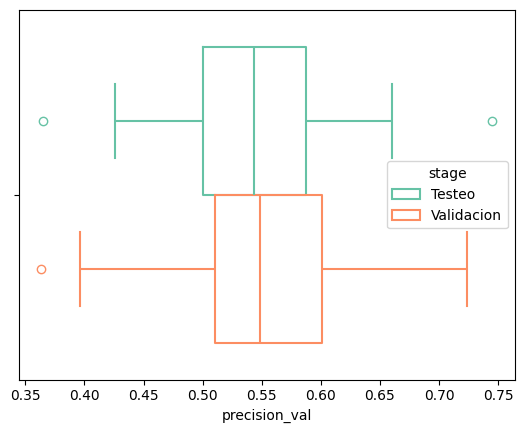

In [14]:
df_concat = pd.concat([df_exploring_rf_test, df_exploring_rf_val], axis=0)
sns.boxplot(data=df_concat, x='precision_val', hue="stage", fill=False, palette="Set2")

In [15]:
df_exploring_ridge_val.describe()

,precision_val,recall_val,f1_val,accuracy_val
count,100.000000,100.000000,100.000000,100.000000
mean,0.589468,0.576329,0.574998,0.552118
std,0.078780,0.099738,0.060336,0.053201
min,0.413793,0.326087,0.439024,0.435294
25%,0.545455,0.500000,0.534496,0.517647
50%,0.590326,0.552912,0.574856,0.552941
75%,0.636755,0.659574,0.616538,0.588235
max,0.785714,0.804878,0.710526,0.741176


In [16]:
df_exploring_rf_val.describe()

,precision_val,recall_val,f1_val,accuracy_val
count,100.000000,100.000000,100.000000,100.000000
mean,0.550373,0.572624,0.557638,0.519529
std,0.071624,0.075651,0.057718,0.049512
min,0.363636,0.386364,0.395062,0.400000
25%,0.510104,0.519630,0.521513,0.482353
50%,0.548810,0.577778,0.551724,0.517647
75%,0.601163,0.625000,0.600000,0.552941
max,0.723404,0.756098,0.686869,0.635294
